In [1]:
#Importar librerías
import time
import pickle
import datetime
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Importar datos 
data01 = pd.read_csv('EURUSD_M1_202001.csv',header=None)#,usecols=(0,1,5)  
data02 = pd.read_csv('EURUSD_M1_202002.csv',header=None)#,usecols=(0,1,5)
data03 = pd.read_csv('EURUSD_M1_202003.csv',header=None)#,usecols=(0,1,5)
data04 = pd.read_csv('EURUSD_M1_202004.csv',header=None)#,usecols=(0,1,5)
data05 = pd.read_csv('EURUSD_M1_202005.csv',header=None)#,usecols=(0,1,5)
data06 = pd.read_csv('EURUSD_M1_202006.csv',header=None)#,usecols=(0,1,5)
data07 = pd.read_csv('EURUSD_M1_202007.csv',header=None)#,usecols=(0,1,5)
data08 = pd.read_csv('EURUSD_M1_202008.csv',header=None)#,usecols=(0,1,5)
data09 = pd.read_csv('EURUSD_M1_202009.csv',header=None)#,usecols=(0,1,5)
data10 = pd.read_csv('EURUSD_M1_202010.csv',header=None)#,usecols=(0,1,5)

#Importar datos de prueba
data11 = pd.read_csv('EURUSD_M1_202011.csv',header=None)#,usecols=(0,1,5)
data12 = pd.read_csv('EURUSD_M1_202012.csv',header=None)#,usecols=(0,1,5)

In [3]:
#data = pd.concat([data08,data09,data10])
def align(data):
    data.columns = ['Day','Minute','Open','High','Low','Close','Volume'] #Cambiar nombre de columnas
    data['Time']= data['Day'].str.cat(data['Minute'], sep =' ') #Unir datos de día y minuto
    data['Time'] = pd.to_datetime(data['Time']) #Data a modo DateTime
    data.pop('Day') #Eliminar columna día
    data.pop('Minute') #Eliminar columna de minutos
    data = data.set_index('Time') #Establecer columna de tiempo como índice
    data.pop('Volume')
    return data

def align2(data):
    data.columns = ['Time','Open','High','Low','Close','Volume'] #Cambiar nombre de columnas
    data['Time'] = pd.to_datetime(data['Time']) #Data a modo DateTime
    data = data.set_index('Time') #Establecer columna de tiempo como índice
    data.pop('Volume')
    return data

In [4]:
#Concatenar datos
data = pd.concat([data01,data02,data03,data04,data05,data06,data07,data08,data09,data10])
data = align(data)
data.head()

,Open,High,Low,Close
Time,,,,
2020-01-01 17:00:00,1.12120,1.12121,1.12117,1.12120
2020-01-01 17:01:00,1.12106,1.12135,1.12106,1.12135
2020-01-01 17:02:00,1.12136,1.12139,1.12136,1.12139
2020-01-01 17:03:00,1.12135,1.12135,1.12120,1.12122
2020-01-01 17:04:00,1.12122,1.12125,1.12122,1.12125


In [5]:
#Rendimientos y tamaños de las velas
#data['Return'] = data.Close/data.Open -1
#data['Size'] = data.High - data.Low
#data = data.dropna()
# data

In [5]:
# # RSI
# delta = data.Close.diff(1)
# up = delta.copy()
# down = delta.copy()
# up[up<0] = 0
# down[down>0] = 0

# #Period
# period = 50
# AVG_Gain = up.rolling(window=period).mean()
# AVG_Loss = abs(down.rolling(window=period).mean())

# #RS
# RS = AVG_Gain / AVG_Loss

# RSI = 100.0 - (100.0 / (1.0 + RS))

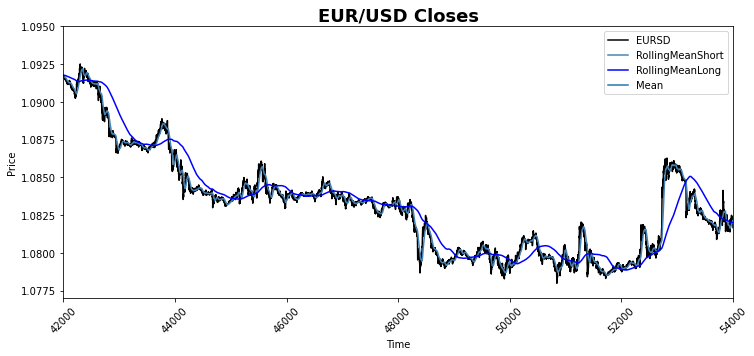

In [5]:
#Graficar los datos
plt.figure(figsize=(12,5))
plt.plot(data.Close.values,label='EURSD',c='k')

plt.plot(np.arange(len(data)),data.Close.rolling(50).mean(),label='RollingMeanShort', c='steelblue')
plt.plot(np.arange(len(data)),data.Close.rolling(500).mean(),label='RollingMeanLong',c='blue')

plt.plot(np.arange(len(data)),np.ones(len(data))*data.Close.mean(),label='Mean')
plt.title('EUR/USD Closes',fontdict={'weight':'bold','fontsize':'18'})
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')
plt.ylim(1.077,1.095)
plt.xlim(42000,54000)
plt.legend()
plt.show()

#Fig2
#plt.figure(figsize=(12,5))
#plt.plot(RSI.values, label='RSI')
#plt.title('EUR/USD RSI',fontdict={'weight':'bold','fontsize':'18'})
#plt.xticks(rotation=45)
#plt.xlabel('Time')
#plt.ylabel('RSI')
## plt.ylim(1.175,1.2)
# plt.xlim(24000,34000)
#plt.legend()
#plt.show()

In [6]:
data2 = pd.DataFrame(data['Close'])
RMS = 50
RML = 500
M = 3
data2['RMShort'] = data2.Close.rolling(50).mean()
data2['RMSLong'] = data2.Close.rolling(500).mean()
# data2 = data2.dropna()
a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]

b = np.arange(len(data2))
c = []
d = []
for k in range(1,len(data2)):
    if a[k] > a[k-1]:
        c.append(k)
    elif a[k] < a[k-1]:
        d.append(k)
        
TH = 0.002
for i in range(len(d)):
    series = np.array(data2.Close[c[i]:d[i]+1])
    for k in range(len(series)):
        if series[0] - series[k] > TH:
            d[i] = d[i] - (len(series)-k-1)
            break
            
Compra = data2.Close[c].values
Venta = data2.Close[d].values

x = (Venta - Compra)
per = x[x<0]
gain = x[x>0]
per.mean(), gain.mean(), x.sum()

(-0.0009271319796954419, 0.0024828571428571564, 0.03444999999999809)

### **Func**

In [7]:
def estrategia(data:'Datos a probar',
               TH:'StopLoss',
               RMS:'Media Móvil Corta',
               RML:'Media Móvil Larga',
               M:'Multiplicador de TakeProfit en función de StopLoss'):
    
    data2 = pd.DataFrame(data['Close'])
    data2['RMShort'] = data2.Close.rolling(RMS).mean()
    data2['RMSLong'] = data2.Close.rolling(RML).mean()

    a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]
    
    c = []
    d = []
    for k in range(1,len(data2)):
        if a[k] > a[k-1]:
            c.append(k)
        elif a[k] < a[k-1]:
            d.append(k)
            
    for i in range(len(d)):
        series = np.array(data2.Close[c[i]:d[i]+1])
        for k in range(len(series)):
            if series[0] - series[k] >= TH or series[k] - series[0] >= M*TH:
                d[i] = d[i] - (len(series)-k-1)
                break

    Compra = data2.Close[c].values
    Venta = data2.Close[d].values
    
    if len(Compra)==len(Venta):
        x = (Venta - Compra)
    else:
        x = (Venta - Compra[:-1])
        
    return x.sum(), x, c,d,Compra,Venta

In [8]:
def estrategiacomp(data:'Datos a probar',
                   TH:'StopLoss',
                   RMS:'Media Móvil Corta',
                   RML:'Media Móvil Larga',
                   M:'Multiplicador de TakeProfit en función de StopLoss'):
    
    data2 = pd.DataFrame(data['Close'])
    data2['RMShort'] = data2.Close.rolling(RMS).mean()
    data2['RMSLong'] = data2.Close.rolling(RML).mean()
    M_TH = M*TH
    a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]

    c = []
    d = []
    for k in range(1,len(data2)):
        if a[k] > a[k-1]:
            c.append(k)
        elif a[k] < a[k-1]:
            d.append(k)

    c_ = c[1:]
    d_ = d
            
    #Compra a Venta
    for i in range(len(d)):
        series = np.array(data2.Close[c[i]:d[i]+1])
        for k in range(len(series)):
            if series[0] - series[k] >= TH or series[k] - series[0] >= M_TH:
                d[i] = d[i] - (len(series)-k-1)
                break

    Compra = data2.Close[c].values
    Venta = data2.Close[d].values

    x = (Venta - Compra[:len(Venta)])

    #Venta Rápida
    for i in range(len(d_)-1):
        series_ = np.array(data2.Close[d_[i]:c_[i]+1])
        for k in range(len(series_)):
            if series_[k] - series_[0] >= TH or series_[0] - series_[k] >= M_TH:
                c_[i] = c_[i] - (len(series_)-k-1)
                break

    Compra_ = data2.Close[c_].values
    Venta_ = data2.Close[d_].values

    y = (Venta_[:len(Compra_)] - Compra_)


    profit_compras = x.sum()
    profit_ventas = y.sum()

    profit = profit_compras + profit_ventas

    return profit_compras, profit_ventas, profit

In [9]:
def compra_abierta():
    m_th = M*TH
    th = TH
    return [next((x for x in xs if x - xs[0] >= th or xs[0] - x >= m_th),xs[0])for xs in series]

In [10]:
def venta_abierta():
    m_th = M*TH
    th = TH
    return [next((x for x in xs if xs[0] - x >= th or x - xs[0] >= m_th),xs[0])for xs in series_]

In [11]:
def estrategiaabierta(data:'Datos a probar',
                   TH:'StopLoss',
                   RMS:'Media Móvil Corta',
                   RML:'Media Móvil Larga',
                   M:'Multiplicador de TakeProfit en función de StopLoss'):
    
    data2 = pd.DataFrame(data['Close'])
    data2['RMShort'] = data2.Close.rolling(RMS).mean()
    data2['RMSLong'] = data2.Close.rolling(RML).mean()
    M_TH = M*TH
    a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]

    c = []
    d = []
    for k in range(1,len(data2)):
        if a[k] > a[k-1]:
            c.append(k)
        elif a[k] < a[k-1]:
            d.append(k)
    series = []        
    for i in range(len(c)):
        series.append(np.array(data2.Close[c[i]:]))
    
    series_ = []
    for i in range(len(d)):
        series_.append(np.array(data2.Close[d[i]:]))

    Compra = data2.Close[c].values
    Venta = [next((x for x in xs if xs[0] - x >= TH or x - xs[0] >= M_TH),xs[0])for xs in series]

    x = (Venta - Compra[:len(Venta)])

    Compra_ = [next((x for x in xs if x - xs[0] >= TH or xs[0] - x >= M_TH),xs[0])for xs in series_]
    Venta_ = data2.Close[d].values

    y = (Venta_[:len(Compra_)] - Compra_)


    profit_compras = x.sum()
    profit_ventas = y.sum()

    profit = profit_compras + profit_ventas
    
    return profit_compras, profit_ventas, profit

In [12]:
def strat_ema(data:'Datos a probar',
                   TH:'StopLoss',
                   RMS:'Media Móvil Corta',
                   RML:'Media Móvil Larga',
                   M:'Multiplicador de TakeProfit en función de StopLoss'):
    
    data2 = pd.DataFrame(data['Close'])
    data2['RMShort'] = data2.Close.ewm(span=RMS, adjust=False).mean()
    data2['RMSLong'] = data2.Close.ewm(span=RML, adjust=False).mean()
    M_TH = M*TH
    a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]

    c = []
    d = []
    for k in range(1,len(data2)):
        if a[k] > a[k-1]:
            c.append(k)
        elif a[k] < a[k-1]:
            d.append(k)

    c_ = c[1:]
    d_ = d
            
    #Compra a Venta
    for i in range(len(d)):
        series = np.array(data2.Close[c[i]:d[i]+1])
        for k in range(len(series)):
            if series[0] - series[k] >= TH or series[k] - series[0] >= M_TH:
                d[i] = d[i] - (len(series)-k-1)
                break

    Compra = data2.Close[c].values
    Venta = data2.Close[d].values

    x = (Venta - Compra[:len(Venta)])

    #Venta Rápida
    for i in range(len(d_)-1):
        series_ = np.array(data2.Close[d_[i]:c_[i]+1])
        for k in range(len(series_)):
            if series_[k] - series_[0] >= TH or series_[0] - series_[k] >= M_TH:
                c_[i] = c_[i] - (len(series_)-k-1)
                break

    Compra_ = data2.Close[c_].values
    Venta_ = data2.Close[d_].values

    y = (Venta_[:len(Compra_)] - Compra_)


    profit_compras = x.sum()
    profit_ventas = y.sum()

    profit = profit_compras + profit_ventas

    return profit_compras, profit_ventas, profit

In [13]:
def sae(data:'Datos a probar',
                   TH:'StopLoss',
                   RMS:'Media Móvil Corta',
                   RML:'Media Móvil Larga',
                   M:'Multiplicador de TakeProfit en función de StopLoss'):
    
    data2 = pd.DataFrame(data['Close'])
    data2['RMShort'] = data2.Close.ewm(span=RMS, adjust=False).mean()
    data2['RMSLong'] = data2.Close.rolling(RML).mean()
    M_TH = M*TH
    a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]

    c = []
    d = []
    for k in range(1,len(data2)):
        if a[k] > a[k-1]:
            c.append(k)
        elif a[k] < a[k-1]:
            d.append(k)
    series = []        
    for i in range(len(c)):
        series.append(np.array(data2.Close[c[i]:]))
    
    series_ = []
    for i in range(len(d)):
        series_.append(np.array(data2.Close[d[i]:]))

    Compra = data2.Close[c].values
    Venta = [next((x for x in xs if xs[0] - x >= TH or x - xs[0] >= M_TH),xs[0])for xs in series]

    x = (Venta - Compra[:len(Venta)])

    Compra_ = [next((x for x in xs if x - xs[0] >= TH or xs[0] - x >= M_TH),xs[0])for xs in series_]
    Venta_ = data2.Close[d].values

    y = (Venta_[:len(Compra_)] - Compra_)


    profit_compras = x.sum()
    profit_ventas = y.sum()

    profit = profit_compras + profit_ventas
    
    return profit_compras, profit_ventas, profit

In [34]:
RMS = 50
RML = 400

In [35]:
start = time.time()
a__, b__, c__= estrategiaabierta(data,TH,RMS,RML,M)
end = time.time()
print(end - start)

1.4301252365112305


In [14]:
#Multiples backtestings
#Datos a tomar
#data

#Threshold / StopLoss
TH_ = np.arange(0.0003,0.003,0.0003)

#Rolling Mean Short
RMS_ = np.arange(20,75,5).astype(int)

#Rolling Mean long
RML_ = np.arange(100,550,50).astype(int)

#Multiplicador de StopLoss para TakeProfit
M_ = np.arange(2,6,1).astype(int)

In [15]:
#Número de iteraciones
len(TH_)*len(RMS_)*len(RML_)*len(M_)

3960

In [16]:
#Orden y valores
#índice
Orden = ['SL_%s'%round(a,5)+'_RMS_%s'%b+'_RML_%s'%c+'_TP_%s'%round((a*m),5) for a in TH_ for b in RMS_ for c in RML_ for m in M_]

#TH
OrdenTH = [a for a in TH_ for b in RMS_ for c in RML_ for m in M_]

#RMS
OrdenRMS = [b for a in TH_ for b in RMS_ for c in RML_ for m in M_]

#RML
OrdenRML = [c for a in TH_ for b in RMS_ for c in RML_ for m in M_]

#StopLoss
OrdenSL = [round((a*m),5) for a in TH_ for b in RMS_ for c in RML_ for m in M_]

In [20]:
#Res = [estrategiacomp(data,a,b,c,m) for a in TH_ for b in RMS_ for c in RML_ for m in M_]
#11:40-
#Res

In [127]:
#Estructura abierta
start = time.time()
#Res = [estrategiacomp(data,a,b,c,m) for a in TH_ for b in RMS_ for c in RML_ for m in M_]
end = time.time()
print(end - start)

2683.1266436576843


In [96]:
#Estructura abierta
start = time.time()
#Res_abierta = [estrategiaabierta(data,a,b,c,m) for a in TH_ for b in RMS_ for c in RML_ for m in M_]
end = time.time()
print(end - start)
#10425.4

10425.406019210815


In [21]:
#Res

In [23]:
#Guardar resultados
#pickle.dump(Res,open('Res.sav','wb'))

In [18]:
#Cargar resultados
#Res = pickle.load(open('Res.sav', 'rb'))
Res = pickle.load(open('Res_abierta.sav', 'rb')) #Res Abierta

In [19]:
#Res2 = [estrategiacomp(data_test,a,b,c,m) for a in TH_ for b in RMS_ for c in RML_ for m in M_]

In [20]:
#Ordenar resultados

#Profit compra-venta
profit_cv = [i[0] for i in Res]

#Profit venta en corto
profit_vc = [i[1] for i in Res]

#Profit completo
profit = [i[2] for i in Res]

In [160]:
# ##Ordenar resultados
# #
# ##Profit compra-venta
# profit_cv = [i[0] for i in Res_abierta]
# #
# ##Profit venta en corto
# profit_vc = [i[1] for i in Res_abierta]
# #
# ##Profit completo
# profit = [i[2] for i in Res_abierta]

In [21]:
#Mostrar Resultados
dfRes = pd.DataFrame({'Profit':profit,'Profit Compra-Venta':profit_cv,
                      'Profit Venta-Compra':profit_vc,'TH':OrdenTH,
                      'RMS':OrdenRMS,'RML':OrdenRML,
                      'TakeProfit':OrdenSL}, index = Orden)
dfRes.head()

,Profit,Profit Compra-Venta,Profit Venta-Compra,TH,RMS,RML,TakeProfit
SL_0.0003_RMS_20_RML_100_TP_0.0006,-0.06815,-0.06679,-0.00136,0.0003,20,100,0.0006
SL_0.0003_RMS_20_RML_100_TP_0.0009,-0.12517,-0.08865,-0.03652,0.0003,20,100,0.0009
SL_0.0003_RMS_20_RML_100_TP_0.0012,-0.12717,-0.10213,-0.02504,0.0003,20,100,0.0012
SL_0.0003_RMS_20_RML_100_TP_0.0015,-0.16387,-0.09538,-0.06849,0.0003,20,100,0.0015
SL_0.0003_RMS_20_RML_150_TP_0.0006,-0.07679,-0.03402,-0.04277,0.0003,20,150,0.0006


In [22]:
#Visualizar los mejores
#Num de mejores a tomar
n = 10
As = dfRes.sort_values(by=['Profit'], ascending=False).head(n)
As

,Profit,Profit Compra-Venta,Profit Venta-Compra,TH,RMS,RML,TakeProfit
SL_0.003_RMS_20_RML_150_TP_0.015,2.03587,2.26288,-0.22701,0.003,20,150,0.015
SL_0.003_RMS_20_RML_100_TP_0.015,2.03041,2.55314,-0.52273,0.003,20,100,0.015
SL_0.003_RMS_55_RML_100_TP_0.015,1.88459,2.11239,-0.22780,0.003,55,100,0.015
SL_0.003_RMS_45_RML_100_TP_0.015,1.84363,2.03437,-0.19074,0.003,45,100,0.015
SL_0.003_RMS_50_RML_100_TP_0.015,1.81376,1.99466,-0.18090,0.003,50,100,0.015
SL_0.003_RMS_40_RML_100_TP_0.015,1.74463,2.08106,-0.33643,0.003,40,100,0.015
SL_0.003_RMS_25_RML_100_TP_0.015,1.73770,2.29785,-0.56015,0.003,25,100,0.015
SL_0.003_RMS_60_RML_100_TP_0.015,1.71626,1.92024,-0.20398,0.003,60,100,0.015
SL_0.003_RMS_25_RML_150_TP_0.015,1.70517,1.87067,-0.16550,0.003,25,150,0.015
SL_0.003_RMS_30_RML_150_TP_0.015,1.70120,1.71588,-0.01468,0.003,30,150,0.015


### **Probar Resultados**

In [23]:
#Transformar datos de prueba
data_test = pd.concat([data11,data12])
data_test = align2(data_test)

In [24]:
#Mejores Valores Obtenidos
B_TH = As.TH.values #Threshold (StopLoss)
B_RMS = As.RMS.values #Rolling Mean Short
B_RML = As.RML.values #Rolling Mean Long
B_TP = As.TakeProfit.values/B_TH #Take Profit
B_Index = As.index.values

In [61]:
#Mejores resultados
Best = []
for i in range(len(B_TH)):
    Best.append(estrategiacomp(data_test, B_TH[i],B_RMS[i],B_RML[i],B_TP[i]))

In [25]:
#Mejores resultados
Best = []
for i in range(len(B_TH)):
    Best.append(estrategiaabierta(data_test, B_TH[i],B_RMS[i],B_RML[i],B_TP[i]))

In [32]:
# Best

In [26]:
#Ordenar resultados

#Profit compra-venta
cv_test = [i[0] for i in Best]

#Profit venta en corto
vc_test = [i[1] for i in Best]

#Profit completo
profit_test = [i[2] for i in Best]

In [27]:
#Mostrar Resultados
dfBest = pd.DataFrame({'Profit':profit_test,'Profit Compra-Venta':cv_test,
                       'Profit Venta-Compra':vc_test,
                       'TH':B_TH,'RMS':B_RMS,'RML':B_RML,
                       'TakeProfit':B_TP*B_TH}, index = B_Index)
dfBest

,Profit,Profit Compra-Venta,Profit Venta-Compra,TH,RMS,RML,TakeProfit
SL_0.003_RMS_20_RML_150_TP_0.015,-0.11058,0.78803,-0.89861,0.003,20,150,0.015
SL_0.003_RMS_20_RML_100_TP_0.015,-0.31674,0.82559,-1.14233,0.003,20,100,0.015
SL_0.003_RMS_55_RML_100_TP_0.015,-0.13163,0.77255,-0.90418,0.003,55,100,0.015
SL_0.003_RMS_45_RML_100_TP_0.015,-0.13541,0.77121,-0.90662,0.003,45,100,0.015
SL_0.003_RMS_50_RML_100_TP_0.015,-0.12933,0.76117,-0.89050,0.003,50,100,0.015
SL_0.003_RMS_40_RML_100_TP_0.015,-0.16443,0.73005,-0.89448,0.003,40,100,0.015
SL_0.003_RMS_25_RML_100_TP_0.015,-0.16667,0.88320,-1.04987,0.003,25,100,0.015
SL_0.003_RMS_60_RML_100_TP_0.015,-0.14527,0.75865,-0.90392,0.003,60,100,0.015
SL_0.003_RMS_25_RML_150_TP_0.015,-0.09414,0.73636,-0.83050,0.003,25,150,0.015
SL_0.003_RMS_30_RML_150_TP_0.015,-0.15740,0.62839,-0.78579,0.003,30,150,0.015


In [58]:
estrategiaabierta(data_test, 0.003,10,15,4)

(5.045320000000001, -5.783309999999996, -0.7379899999999946)

In [63]:
estrategiaabierta(data, 0.003,10,15,10)

(23.219709999999978, -11.294880000000045, 11.924829999999933)

In [94]:
sae(data_test, 0.004,10,150,10)

(2.5490300000000006, -1.481729999999998, 1.0673000000000026)

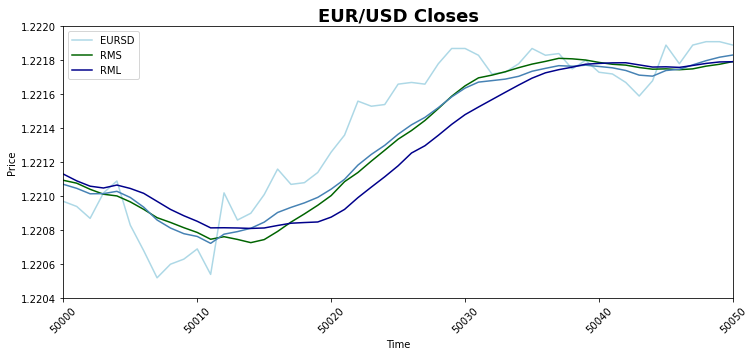

In [91]:
#Graficar los datos
plt.figure(figsize=(12,5))

#plt.scatter(c, data2.Close.values[c], color='darkblue')
#plt.scatter(d, data2.Close.values[d], color='darkgreen')
plt.plot(data_test.Close.values,label='EURSD',color='lightblue')
plt.plot(data_test.Close.rolling(10).mean().values,label='RMS',color='darkgreen')
plt.plot(data_test.Close.ewm(span=10, adjust=False).mean().values,color='steelblue')
plt.plot(data_test.Close.rolling(15).mean().values,label='RML',color='darkblue')

plt.title('EUR/USD Closes',fontdict={'weight':'bold','fontsize':'18'})
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Price')


plt.legend()
plt.xlim(50000,50050)
plt.ylim(1.2204,1.222)

plt.show()

### **Segundos Parámetros**

In [155]:
#Multiples backtestings
#Datos a tomar
#data

#Threshold / StopLoss
TH_2 = np.arange(0.003,0.006,0.0005)

#Rolling Mean Short
RMS_2 = np.arange(10,50,10).astype(int)

#Rolling Mean long
RML_2 = np.arange(100,400,50).astype(int)

#Multiplicador de StopLoss para TakeProfit
M_2 = np.arange(2,7,1).astype(int)

#Orden y valores
#índice
Orden2 = ['SL_%s'%round(a,5)+'_RMS_%s'%b+'_RML_%s'%c+'_TP_%s'%round((a*m),5) for a in TH_2
          for b in RMS_2 for c in RML_2 for m in M_2]

#TH
OrdenTH2 = [a for a in TH_2 for b in RMS_2 for c in RML_2 for m in M_2]

#RMS
OrdenRMS2 = [b for a in TH_2 for b in RMS_2 for c in RML_2 for m in M_2]

#RML
OrdenRML2 = [c for a in TH_2 for b in RMS_2 for c in RML_2 for m in M_2]

#StopLoss
OrdenSL2 = [round((a*m),5) for a in TH_2 for b in RMS_2 for c in RML_2 for m in M_2]

#Número de iteraciones
len(TH_2)*len(RMS_2)*len(RML_2)*len(M_2)

720

In [ ]:
# #Estructura abierta
# start = time.time()
# Res2 = [estrategiaabierta(data,a,b,c,m) for a in TH_2 for b in RMS_2 for c in RML_2 for m in M_2]
# end = time.time()
# print(end - start)

In [ ]:
#estrategiaabierta(data,a,b,c,m)

In [ ]:
#Guardar resultados
#pickle.dump(Res2,open('Res2.sav','wb'))

#Cargar resultados
#Res2 = pickle.load(open('Res2.sav', 'rb'))

In [ ]:
#Ordenar resultados

#Profit compra-venta
profit_cv2 = [i[0] for i in Res2]

#Profit venta en corto
profit_vc2 = [i[1] for i in Res2]

#Profit completo
profit2 = [i[2] for i in Res2]

In [138]:
#Mostrar Resultados
dfRes2 = pd.DataFrame({'Profit':profit2,'Profit Compra-Venta':profit_cv2,
                      'Profit Venta-Compra':profit_vc2,'TH':OrdenTH2,
                      'RMS':OrdenRMS2,'RML':OrdenRML2,
                      'TakeProfit':OrdenSL2}, index = Orden2)
dfRes2.head()

,Profit,Profit Compra-Venta,Profit Venta-Compra,TH,RMS,RML,TakeProfit
SL_0.0003_RMS_20_RML_100_TP_0.0006,-0.06815,-0.06679,-0.00136,0.0003,20,100,0.0006
SL_0.0003_RMS_20_RML_100_TP_0.0009,-0.12517,-0.08865,-0.03652,0.0003,20,100,0.0009
SL_0.0003_RMS_20_RML_100_TP_0.0012,-0.12717,-0.10213,-0.02504,0.0003,20,100,0.0012
SL_0.0003_RMS_20_RML_100_TP_0.0015,-0.16387,-0.09538,-0.06849,0.0003,20,100,0.0015
SL_0.0003_RMS_20_RML_150_TP_0.0006,-0.07679,-0.03402,-0.04277,0.0003,20,150,0.0006


In [68]:
(data['High']- data['Low']).max()

0.00800999999999985

### **Corroborar**

In [47]:
TH = .003
RMS = 10
RML = 15
M = 10

#Estrategia Completa
data2 = pd.DataFrame(data['Close'])
data2['RMShort'] = data2.Close.rolling(RMS).mean()
data2['RMSLong'] = data2.Close.rolling(RML).mean()
M_TH = M*TH
a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]

c = []
d = []
for k in range(1,len(data2)):
    if a[k] > a[k-1]:
        c.append(k)
    elif a[k] < a[k-1]:
        d.append(k)

c_ = c[1:]
d_ = d

#Compra a Venta
for i in range(len(d)):
    series = np.array(data2.Close[c[i]:d[i]+1])
    for k in range(len(series)):
        if series[0] - series[k] >= TH or series[k] - series[0] >= M_TH:
            d[i] = d[i] - (len(series)-k-1)
            break

Compra = data2.Close[c].values
Venta = data2.Close[d].values

x = (Venta - Compra[:len(Venta)])

#Venta Rápida
for i in range(len(d_)-1):
    series_ = np.array(data2.Close[d_[i]:c_[i]+1])
    for k in range(len(series_)):
        if series_[k] - series_[0] >= TH or series_[0] - series_[k] >= M_TH:
            c_[i] = c_[i] - (len(series_)-k-1)
            break

Compra_ = data2.Close[c_].values
Venta_ = data2.Close[d_].values

y = (Venta_[:len(Compra_)] - Compra_)


profit_compras = x.sum()
profit_ventas = y.sum()

profit = profit_compras + profit_ventas

In [71]:
TH = .003
RMS = 10
RML = 15
M = 10

data2 = pd.DataFrame(data_test)
#Estrategia Abierta
#data2 = pd.DataFrame(data)
data2['RMShort'] = data2.Close.rolling(RMS).mean()
data2['RMSLong'] = data2.Close.rolling(RML).mean()
data2 = data2.dropna()
M_TH = M*TH
a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]

c = []
d = []
for k in range(1,len(data2)):
    if a[k] > a[k-1]:
        c.append(k)
    elif a[k] < a[k-1]:
        d.append(k)
        
series = []   
serieshigh = []
serieslow = []
for i in range(len(c)):
    series.append(np.array(data2.Close[c[i]:]))
    serieshigh.append(np.array(data2.High[c[i]:]))
    serieslow.append(np.array(data2.Low[c[i]:])) 

Compra = data2.Close[c].values
Venta = [next((x for x in xs if xs[0] - x >= TH or x - xs[0] >= M_TH),xs[0])for xs in series]
#Profit Compra-Venta
x = (Venta - Compra[:len(Venta)])
    
# series_ = []
# serieshigh_ = []
# serieslow_ = []
# for i in range(len(d)):
#     series_.append(np.array(data2.Close[d[i]:]))
#     serieshigh_.append(np.array(data2.High[d[i]:]))
#     serieslow_.append(np.array(data2.Low[d[i]:])) 
    
# Compra_ = [next((x for x in xs if x - xs[0] >= TH or xs[0] - x >= M_TH),xs[0])for xs in series_]
# Venta_ = data2.Close[d].values
# #Profit Venta en Corto
# y = (Venta_[:len(Compra_)] - Compra_)


profit_compras = x.sum()
# profit_ventas = y.sum()

# profit = profit_compras + profit_ventas

In [93]:
a_ = []   
b_ = []
c_ = []
for i in range(len(c)):
    a_.append(np.array(data2.Close[c[i]:]))
    b_.append(np.array(data2.High[c[i]:]))
    c_.append(np.array(data2.Low[c[i]:])) 

In [96]:
[next((x for x in a_[xs] if a_[xs][0] - x >= TH or x - a_[xs][0] >= M_TH),xs[0])for xs in range(len(a_))]

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-96-afa7cfe27082>, line 1)

In [55]:
indexventa = [list(series[i]).index(Venta[i]) for i in range(len(series))]

In [43]:
indexcompra = [list(series_[i]).index(Compra_[i]) for i in range(len(series_))]

In [206]:
series[0][0], series[0][indexventa[0]]

(1.16445, 1.1609)

In [57]:
x[:1000]

array([-0.00355, -0.00356, -0.00357, -0.00325, -0.00314, -0.0032 ,
       -0.00339, -0.00351, -0.00333, -0.00364, -0.00327, -0.00325,
       -0.00369, -0.00328, -0.00325, -0.00314,  0.03018,  0.03004,
        0.03005,  0.03015,  0.03004, -0.00319, -0.00304, -0.00301,
       -0.0032 , -0.00318, -0.00311,  0.03   ,  0.03009,  0.03008,
        0.03013, -0.00331, -0.00308, -0.00336, -0.00366, -0.00403,
       -0.00301, -0.00313, -0.0041 , -0.00409, -0.00375, -0.00309,
        0.03006,  0.03008,  0.03006,  0.03005,  0.03034,  0.03   ,
       -0.00307,  0.03004,  0.0302 ,  0.03017,  0.03017,  0.03015,
        0.03053,  0.03045,  0.03004,  0.03004,  0.03001, -0.00309,
       -0.00301, -0.00315, -0.00317, -0.00315, -0.00301, -0.00321,
       -0.00321, -0.00304, -0.0033 , -0.00349, -0.0034 , -0.00396,
       -0.00406, -0.00405, -0.00419, -0.004  , -0.00307, -0.00422,
       -0.00303, -0.00425, -0.00352, -0.00358, -0.00333, -0.00335,
       -0.00314, -0.0033 , -0.00338, -0.00326, -0.0037 , -0.00

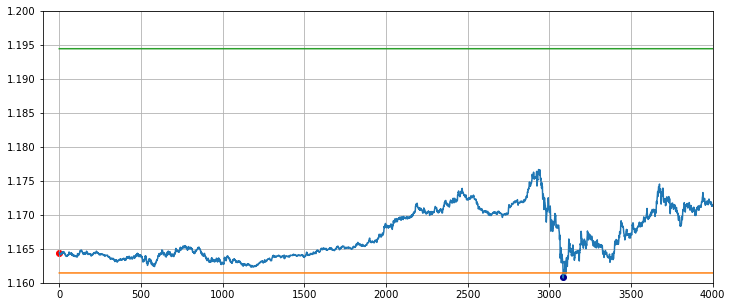

In [40]:
plt.figure(figsize=(12,5))
plt.plot(series[0])


plt.scatter(0,series[0][0], c='red')
plt.scatter(indexventa[0], series[0][indexventa[0]], c='darkblue')

plt.plot(np.arange(0,10000), np.ones(10000)*(series[0][0]-0.003))
plt.plot(np.arange(0,10000), np.ones(10000)*(series[0][0]+0.03))
plt.xlim(-100,4000)
plt.ylim(1.16,1.2)
plt.grid()
plt.show()

In [199]:
indexventa[0], c[1]

(3085, 61)

In [204]:
series[1][0], series[0][0]

(1.16446, 1.16445)

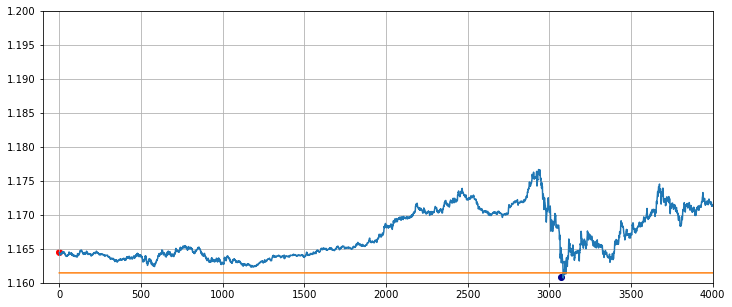

In [203]:
plt.figure(figsize=(12,5))
plt.plot(series[0])


plt.scatter(0,series[1][0], c='red')
plt.scatter(indexventa[1], series[1][indexventa[1]], c='darkblue')

plt.plot(np.arange(0,10000), np.ones(10000)*(series[1][0]-0.003))
plt.xlim(-100,4000)
plt.ylim(1.16,1.2)
plt.grid()
plt.show()

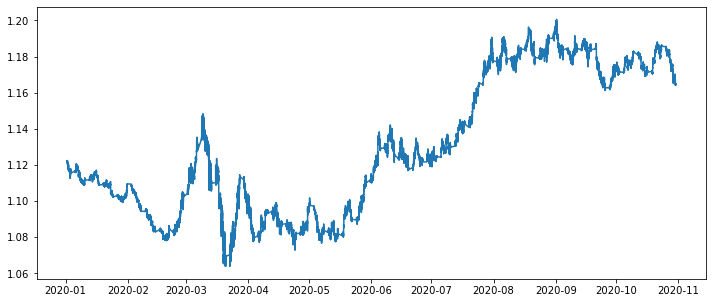

In [63]:
plt.figure(figsize=(12,5))
plt.plot(data.Close)
plt.show()

In [167]:
Venta[0]

1.1609

In [148]:
y

array([-0.00321, -0.00304, -0.00309, ...,  0.     ,  0.     ,  0.     ])

In [149]:
data2.head(60)

,Close,RMShort,RMSLong,a
Time,,,,
2020-11-01 17:14:00,1.16488,1.164871,1.164853,1
2020-11-01 17:15:00,1.16478,1.164864,1.164853,1
2020-11-01 17:16:00,1.16477,1.164851,1.164852,0
2020-11-01 17:17:00,1.16475,1.164839,1.164846,0
2020-11-01 17:18:00,1.16478,1.164832,1.164842,0
2020-11-01 17:19:00,1.16475,1.164824,1.164836,0
2020-11-01 17:20:00,1.16483,1.164822,1.164835,0
2020-11-01 17:21:00,1.16479,1.164814,1.164827,0
2020-11-01 17:22:00,1.16479,1.164804,1.164822,0


In [134]:
x.sum()

10.549830000000007

In [135]:
len(x[x>0]),len(x)

(500, 2312)

### **Otro**

In [232]:
import cProfile
import pstats

profile = cProfile.Profile()
profile.enable()
a__,b__,c__, d__= estrategiaabierta(data,TH,RMS,RML,M)
profile.disable()
ps = pstats.Stats(profile)
ps.sort_stats('calls', 'cumtime') 
ps.print_stats(5)

         11342 function calls (11228 primitive calls) in 1.180 seconds

   Ordered by: call count, cumulative time
   List reduced from 479 to 5 due to restriction <5>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1254    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
     1236    0.000    0.000    1.007    0.001 {built-in method builtins.next}
     1231    0.466    0.000    0.466    0.000 <ipython-input-223-f9b38a944dc8>:34(<genexpr>)
     1230    0.541    0.000    0.541    0.000 <ipython-input-219-da09550e3079>:4(<genexpr>)
     1037    0.000    0.000    0.001    0.000 {built-in method builtins.isinstance}




In [183]:
#Compra_ = []
#for i in series_:
#    try:
#        Compra_.append(next(filter(lambda x: x - i[0] >= TH or i[0] - x >= M*TH, i)))
#    except:
#        Compra_.append(i[0])
#        
#        
#        
#Compra_ = []
#for i in series_:
#    Compra_.append(next(filter(lambda x: x - i[0] >= TH or i[0] - x >= M*TH, i), i[0]))
#    
#    
#    
#Compra_ = []
#for i in series_:
#    try:
#        Compra_.append(next(filter(lambda x: x - i[0] >= TH or i[0] - x >= M*TH, i)))
#    except:
#        Compra_.append(i[0])

In [194]:
RMS = 50
RML = 400
TH = 0.0024
M = 3

def op(data:'Datos a probar',
                   TH:'StopLoss',
                   RMS:'Media Móvil Corta',
                   RML:'Media Móvil Larga',
                   M:'Multiplicador de TakeProfit en función de StopLoss'):
    
    data2 = pd.DataFrame(data['Close'])
    data2['RMShort'] = data2.Close.rolling(RMS).mean()
    data2['RMSLong'] = data2.Close.rolling(RML).mean()
    M_TH = M*TH
    
    a = [1 if i>0 else 0 for i in data2.RMShort-data2.RMSLong]

    c = []
    d = []
    for k in range(1,len(data2)):
        if a[k] > a[k-1]:
            c.append(k)
        elif a[k] < a[k-1]:
            d.append(k)
    
    #Lista de compras y ventas abiertas
    series = []
    series_ = []

    #Compra a Venta
    for i in range(len(c)):
        series.append(np.array(data2.Close[c[i]:]))

    Compra = data2.Close[c].values
    Venta = np.array([next(filter(lambda x: i[0] - x >= TH or x - i[0] >= M_TH, i)) for i in series])

    #Profit por cada compra venta
    x = (Venta - Compra[:len(Venta)])
    #Profit total compra-venta
    profit_compras = x.sum()

    #Venta en corto
    for i in range(len(d)):
        series_.append(np.array(data2.Close[d[i]:]))

    Venta_ = data2.Close[d].values
    
   
    Compra_ = [
        next(
            (x for x in xs if x - xs[0] >= TH or xs[0] - x >= M_TH),
            xs[0]
        )
        for xs in series_
    ]

    #Profit por cada venta en corto
    y = (Venta_[:len(Compra_)] - Compra_)
    #Profit total compra-venta
    profit_ventas = y.sum()

    #Profit Total
    profit = profit_compras + profit_ventas

    return profit_compras, profit_ventas, profit, Venta
#    for k in range(len(series)):
#        if series[0] - series[k] >= TH or series[k] - series[0] >= M*TH:
#            da.append(k+c[i])
#            break
#

#Venta = data2.Close[da].values
#
#    
#
#if len(Compra)==len(Venta):
#    x = (Venta - Compra)
#else:
#    x = (Venta - Compra[:len(Venta)])

#Venta Rápida
#ca = np.zeros(len(d)).astype(int)
#for i in range(len(d)):
#    series = np.array(data2.Close[d[i]:])
#    try:
#        ca[i] = list(series).index(next(filter(lambda x: x - series[0] >= TH or series[0] - x >= M*TH,series)))+d[i]
#    except:
#        ca[i] = d[i]
#
#Compra_ = data2.Close[ca].values
#Venta_ = data2.Close[d].values
#
#if len(Compra_)==len(Venta_):
#    y = (Venta_ - Compra_)
#else:
#    y = (Venta_[:len(Compra_)] - Compra_)


#profit_compras = x.sum()
#profit_ventas = y.sum()

#profit = profit_compras + profit_ventas


    #return profit_compras, profit_ventas, profit